In [39]:
import numpy as np
import sympy as sp
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm

from math import log10

In [40]:
np.sin(90)

0.8939966636005579

In [41]:
range_m = np.array([4.711, 32.787, 36.619, 47.456, 68.986, 80.409])
alpha = np.array([96.024041, 95.302806, 90.571994, 89.747596, 89.333712, 90.014308])
phi = np.array([209.494500, 12.044494, 292.073653, 338.008476, 27.885113, 2.606140])
utmx = np.array([269958.38, 269994.92, 269973.56, 270005.04, 270026.11, 270043.03])
utmy = np.array([3289284.92, 3289291.58, 3289251.91, 3289265.51, 3289313.99, 3289283.87])
utmz = np.array([-13.83, -17.02, -13.83, -13.83, -13.70, -14.85])

tie_points = pd.DataFrame({'Range': range_m, 'alpha': alpha, 'phi': phi, 'UTM X': utmx, 'UTM Y': utmy, 'UTM Z': utmz})
tie_points

,Range,alpha,phi,UTM X,UTM Y,UTM Z
0,4.711,96.024041,209.494500,269958.38,3289284.92,-13.83
1,32.787,95.302806,12.044494,269994.92,3289291.58,-17.02
2,36.619,90.571994,292.073653,269973.56,3289251.91,-13.83
3,47.456,89.747596,338.008476,270005.04,3289265.51,-13.83
4,68.986,89.333712,27.885113,270026.11,3289313.99,-13.70
5,80.409,90.014308,2.606140,270043.03,3289283.87,-14.85


In [4]:
#Read the tiepoints file
tie_points = pd.read_excel('tiepoints.xlsx')
tie_points

FileNotFoundError: [Errno 2] No such file or directory: 'tiepoints.xlsx'

In [42]:
#modify UTM Z
modified_amount = np.array( [0.106]*5 + [0.056])
print(f"Modified amount: {modified_amount}")
tie_points['mod UTM Z'] = tie_points['UTM Z'] - modified_amount
print(tie_points)

Modified amount: [0.106 0.106 0.106 0.106 0.106 0.056]
    Range      alpha         phi      UTM X       UTM Y  UTM Z  mod UTM Z
0   4.711  96.024041  209.494500  269958.38  3289284.92 -13.83    -13.936
1  32.787  95.302806   12.044494  269994.92  3289291.58 -17.02    -17.126
2  36.619  90.571994  292.073653  269973.56  3289251.91 -13.83    -13.936
3  47.456  89.747596  338.008476  270005.04  3289265.51 -13.83    -13.936
4  68.986  89.333712   27.885113  270026.11  3289313.99 -13.70    -13.806
5  80.409  90.014308    2.606140  270043.03  3289283.87 -14.85    -14.906


In [43]:
#Calculate the average of UTM coordinates
avg_utm_x = tie_points['UTM X'].mean()
avg_utm_y = tie_points['UTM Y'].mean()
avg_utm_z = tie_points['mod UTM Z'].mean()

In [44]:
def curv2cartesian(range, alpha, phi):
    theta = np.deg2rad(90- alpha)
    phi = np.deg2rad(phi)
    
    x = range * np.cos(theta) * np.cos(phi)
    y = range * np.cos(theta) * np.sin(phi)
    z = range * np.sin(theta)
    return x, y, z

In [45]:
#Calcalulate Xb, Yb, Zb
tie_points['Xb'] , tie_points['Yb'], tie_points['Zb'] = curv2cartesian(tie_points['Range'], tie_points['alpha'], tie_points['phi'])
print(tie_points)


    Range      alpha         phi      UTM X       UTM Y  UTM Z  mod UTM Z  \
0   4.711  96.024041  209.494500  269958.38  3289284.92 -13.83    -13.936   
1  32.787  95.302806   12.044494  269994.92  3289291.58 -17.02    -17.126   
2  36.619  90.571994  292.073653  269973.56  3289251.91 -13.83    -13.936   
3  47.456  89.747596  338.008476  270005.04  3289265.51 -13.83    -13.936   
4  68.986  89.333712   27.885113  270026.11  3289313.99 -13.70    -13.806   
5  80.409  90.014308    2.606140  270043.03  3289283.87 -14.85    -14.906   

          Xb         Yb        Zb  
0  -4.077825  -2.306606 -0.494399  
1  31.927988   6.812422 -3.030153  
2  13.760667 -33.933193 -0.365568  
3  44.002639 -17.770649  0.209056  
4  60.971718  32.262582  0.802215  
5  80.325831   3.656200 -0.020080  


In [46]:
#Declare tx, ty, tz and ex, ey, ez as symbolics
tx, ty, tz, ex, ey, ez = sp.symbols('tx ty tz ex ey ez')

In [47]:
#Define 3 euler angle rotation matrices with ex, ey, ez
Rx = sp.Matrix([[1, 0, 0], [0, sp.cos(ex), sp.sin(ex)], [0, -sp.sin(ex), sp.cos(ex)]])
Ry = sp.Matrix([[sp.cos(ey), 0, -sp.sin(ey)], [0, 1, 0], [sp.sin(ey), 0, sp.cos(ey)]])
Rz = sp.Matrix([[sp.cos(ez), sp.sin(ez), 0], [-sp.sin(ez), sp.cos(ez), 0], [0, 0, 1]])

In [48]:
Rx

Matrix([
[1,        0,       0],
[0,  cos(ex), sin(ex)],
[0, -sin(ex), cos(ex)]])

In [49]:
Ry

Matrix([
[cos(ey), 0, -sin(ey)],
[      0, 1,        0],
[sin(ey), 0,  cos(ey)]])

In [50]:
Rz

Matrix([
[ cos(ez), sin(ez), 0],
[-sin(ez), cos(ez), 0],
[       0,       0, 1]])

In [51]:
R = Rx * Ry * Rz
R

Matrix([
[                          cos(ey)*cos(ez),                            sin(ez)*cos(ey),        -sin(ey)],
[sin(ex)*sin(ey)*cos(ez) - sin(ez)*cos(ex),  sin(ex)*sin(ey)*sin(ez) + cos(ex)*cos(ez), sin(ex)*cos(ey)],
[sin(ex)*sin(ez) + sin(ey)*cos(ex)*cos(ez), -sin(ex)*cos(ez) + sin(ey)*sin(ez)*cos(ex), cos(ex)*cos(ey)]])

In [52]:
#Define symbolic variables for the body coordinates
xb, yb, zb = sp.symbols('xb yb zb')

In [53]:
#Define rigid body transformation matrix
r_global = sp.Matrix([tx, ty, tz]) +R*sp.Matrix([xb, yb, zb])
r_global

Matrix([
[                                                                 tx + xb*cos(ey)*cos(ez) + yb*sin(ez)*cos(ey) - zb*sin(ey)],
[ ty + xb*(sin(ex)*sin(ey)*cos(ez) - sin(ez)*cos(ex)) + yb*(sin(ex)*sin(ey)*sin(ez) + cos(ex)*cos(ez)) + zb*sin(ex)*cos(ey)],
[tz + xb*(sin(ex)*sin(ez) + sin(ey)*cos(ex)*cos(ez)) + yb*(-sin(ex)*cos(ez) + sin(ey)*sin(ez)*cos(ex)) + zb*cos(ex)*cos(ey)]])

In [54]:
#Define jacobian matrix of r_global
A = r_global.jacobian([tx, ty, tz, ex, ey, ez])
A

Matrix([
[1, 0, 0,                                                                                                                      0,                        -xb*sin(ey)*cos(ez) - yb*sin(ey)*sin(ez) - zb*cos(ey),                                                         -xb*sin(ez)*cos(ey) + yb*cos(ey)*cos(ez)],
[0, 1, 0,  xb*(sin(ex)*sin(ez) + sin(ey)*cos(ex)*cos(ez)) + yb*(-sin(ex)*cos(ez) + sin(ey)*sin(ez)*cos(ex)) + zb*cos(ex)*cos(ey), xb*sin(ex)*cos(ey)*cos(ez) + yb*sin(ex)*sin(ez)*cos(ey) - zb*sin(ex)*sin(ey), xb*(-sin(ex)*sin(ey)*sin(ez) - cos(ex)*cos(ez)) + yb*(sin(ex)*sin(ey)*cos(ez) - sin(ez)*cos(ex))],
[0, 0, 1, xb*(-sin(ex)*sin(ey)*cos(ez) + sin(ez)*cos(ex)) + yb*(-sin(ex)*sin(ey)*sin(ez) - cos(ex)*cos(ez)) - zb*sin(ex)*cos(ey), xb*cos(ex)*cos(ey)*cos(ez) + yb*sin(ez)*cos(ex)*cos(ey) - zb*sin(ey)*cos(ex),  xb*(sin(ex)*cos(ez) - sin(ey)*sin(ez)*cos(ex)) + yb*(sin(ex)*sin(ez) + sin(ey)*cos(ex)*cos(ez))]])

In [55]:
#Define a function to calulate the jacobian matrix with respect to the given euler angles and translation parameters
jacobian_f = sp.lambdify((tx, ty, tz, ex, ey, ez, xb, yb, zb), A, 'numpy')

In [56]:
#Define a function to calulate the rotation matrix with respect to the given euler angles
R_f = sp.lambdify((ex, ey, ez), R, 'numpy')

In [57]:
#Get the values of the body coordinate from tie_points dataframe and convert into numpy array
xb = tie_points['Xb'].values
yb = tie_points['Yb'].values
zb = tie_points['Zb'].values 

body_coords = np.array([xb, yb, zb]).T
print(body_coords)

[[-4.07782535e+00 -2.30660586e+00 -4.94399429e-01]
 [ 3.19279884e+01  6.81242215e+00 -3.03015329e+00]
 [ 1.37606673e+01 -3.39331925e+01 -3.65567945e-01]
 [ 4.40026394e+01 -1.77706487e+01  2.09056332e-01]
 [ 6.09717182e+01  3.22625825e+01  8.02214550e-01]
 [ 8.03258307e+01  3.65620039e+00 -2.00798727e-02]]


In [72]:
#Get the values of the UTM coordinate from tie_points dataframe and convert into numpy array
x_utm = tie_points['UTM X'].values
y_utm = tie_points['UTM Y'].values
z_utm = tie_points['mod UTM Z'].values

utm_coords = np.array([x_utm, y_utm, z_utm]).T
print(utm_coords)

[[ 2.69958380e+05  3.28928492e+06 -1.39360000e+01]
 [ 2.69994920e+05  3.28929158e+06 -1.71260000e+01]
 [ 2.69973560e+05  3.28925191e+06 -1.39360000e+01]
 [ 2.70005040e+05  3.28926551e+06 -1.39360000e+01]
 [ 2.70026110e+05  3.28931399e+06 -1.38060000e+01]
 [ 2.70043030e+05  3.28928387e+06 -1.49060000e+01]]


In [112]:
#initial guess for the translation parameters and euler angles
tx_scalar = avg_utm_x
ty_scalar = avg_utm_y
tz_scalar = avg_utm_z
ex_scalar = 0
ey_scalar = 0
ez_scaler = 0

In [90]:
print(f"Initial guess for tx, ty, tz, ex, ey, ez: {tx_scalar, ty_scalar, tz_scalar, ex_scalar, ey_scalar, ez_scaler}")

Initial guess for tx, ty, tz, ex, ey, ez: (270000.1733333334, 3289281.9633333334, -14.607666666666669, 0, 0, 0)


In [91]:
def log_transform(x):
    if x>=0:
        return log10(x)
    else:
        return -log10(-x)

In [113]:
NUM_ITERATIONS = 10
for i in tqdm(range(NUM_ITERATIONS)):
    print('Solving iteration: ', i+1)
    #Calculate the jacobian matrix
    J = jacobian_f(tx_scalar, ty_scalar, tz_scalar, ex_scalar, ey_scalar, ez_scaler, body_coords[0, 0], body_coords[0, 1], body_coords[0, 2])
    for q in range(1,body_coords.shape[0]):
        xb_n = body_coords[q, 0]
        yb_n = body_coords[q, 1]
        zb_n = body_coords[q, 2]        
        #Calculate the jacobian matrix
        J_q = jacobian_f(tx_scalar, ty_scalar, tz_scalar, ex_scalar, ey_scalar, ez_scaler, xb_n, yb_n, zb_n)
        #Append the jacobian matrix
        J = np.vstack((J, J_q))

    #print(J)
    #Calculate the residuals
    R_np = R_f(ex_scalar, ey_scalar, ez_scaler) #rotation matrix
    R_np = np.array(R_np).astype(np.float64)

    residuals = utm_coords[0] - ( np.array([tx_scalar, ty_scalar, tz_scalar]).T + R_np@body_coords[0])
    print(f'trans {np.array([tx_scalar, ty_scalar, tz_scalar])}')
    for q in range(1, body_coords.shape[0]):
        res_q = utm_coords[q] - ( np.array([tx_scalar, ty_scalar, tz_scalar]).T + R_np@body_coords[q])
        #print(utm_coords[q])
        residuals = np.hstack((residuals, res_q))
        
    print(residuals)
    #Calculate the correction
    #rint(f' Here: {residuals.shape}')
    correction = np.linalg.inv(J.T @ J) @ J.T @ residuals
    #Update the translation parameters and euler angles
    tx_scalar += correction[0]
    ty_scalar += correction[1]
    tz_scalar += correction[2]
    ex_scalar += correction[3]
    ey_scalar += correction[4]
    ez_scaler += correction[5]

    #Append the values to the holders
    tx_holder.append(log_transform(tx_scalar))
    ty_holder.append(log_transform(ty_scalar))
    tz_holder.append(log_transform(tz_scalar))
    ex_holder.append(ex_scalar)
    ey_holder.append(ey_scalar)
    ez_holder.append(ez_scaler)
    


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1428.48it/s]

Solving iteration:  1
trans [ 2.70000173e+05  3.28928196e+06 -1.46076667e+01]
[-3.77155080e+01  5.26327253e+00  1.16606610e+00 -3.71813218e+01
  2.80424452e+00  5.11819957e-01 -4.03740007e+01  3.87985921e+00
  1.03723461e+00 -3.91359728e+01  1.31731537e+00  4.62610335e-01
 -3.50350515e+01 -2.35915823e-01 -5.47883652e-04 -3.74691640e+01
 -1.74953373e+00 -2.78253461e-01]
Solving iteration:  2
trans [ 2.69962519e+05  3.28928699e+06 -1.34930852e+01]
[ 0.12375525 -0.10962556 -0.02700485  0.07271616  0.46537595 -0.04304886
  0.15481209 -0.11994814 -0.01237137  0.14924341 -0.11383838 -0.00987475
  0.14453052 -0.08460513  0.04682183  0.17054748 -0.08540821 -0.04806625]
Solving iteration:  3
trans [ 2.69962656e+05  3.28928698e+06 -1.34902616e+01]
[-0.01239531 -0.10080937 -0.02825798 -0.06251571  0.46974777 -0.04223532
  0.01880895 -0.11112882  0.03863051  0.01318375 -0.10488612  0.03081401
  0.00824093 -0.07541418  0.0236633   0.03468734 -0.07763762 -0.02262043]
Solving iteration:  4
trans [ 2.

In [99]:
# Round all the values to 3 decimal places
tx_scalar = round(tx_scalar, 2)
ty_scalar = round(ty_scalar, 2)
tz_scalar = round(tz_scalar, 2)
ex_scalar = round(ex_scalar, 6)
ey_scalar = round(ey_scalar, 6)
ez_scaler = round(ez_scaler, 6)

In [100]:
#print the final values of the translation parameters and euler angles
print(f" Transformation found: \n Tx: {tx_scalar}\n Ty: {ty_scalar}\n Tz: {tz_scalar}\n ex: {ex_scalar}\n ey: {ey_scalar}\n ez: {ez_scaler}")

 Transformation found: 
 Tx: 269962.66
 Ty: 3289286.98
 Tz: -13.49
 ex: 0.001953
 ey: -0.01716
 ez: 0.08319


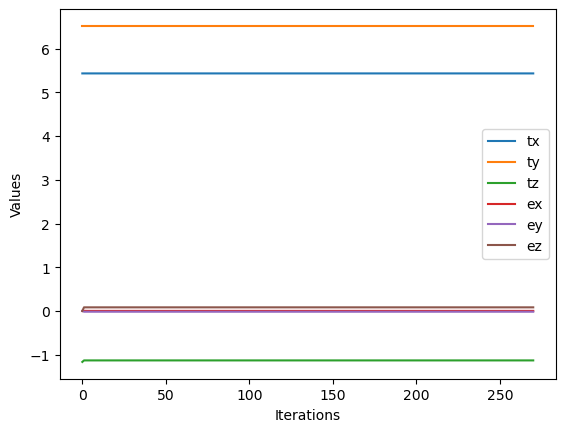

In [101]:
#Plot the translation parameters and euler angles agains iterations
#to show that the solution has converged
plt.plot(tx_holder, label='tx')
plt.plot(ty_holder, label='ty')
plt.plot(tz_holder, label='tz')
plt.plot(ex_holder, label='ex')
plt.plot(ey_holder, label='ey')
plt.plot(ez_holder, label='ez')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.legend()
plt.show()

In [29]:
#load scan.npy
scan = np.load('scan.npy')
print(scan.shape)

(1176072, 4)


In [30]:
scan_rap = scan[:,:3] #range, alpha, phi
scan_xyz = np.array(curv2cartesian(scan_rap[:,0], scan_rap[:,1], scan_rap[:,2])).T

print(scan_xyz.shape)


(1176072, 3)


In [31]:
scan_xyz_transformed = np.zeros(scan_xyz.shape)
for i in range(scan_xyz.shape[0]):
    scan_xyz_transformed[i] = np.array([tx_scalar, ty_scalar, tz_scalar]) + R_np@scan_xyz[i]

In [32]:
intensity = scan[:,3]
scan_xyz_transformed = np.hstack((scan_xyz_transformed, intensity[:,None]))

In [33]:
#Save the transformed scan
np.save('scan_transformed.npy', scan_xyz_transformed)
#Save the transformed scan points as text file
np.savetxt('scan_transformed.txt', scan_xyz_transformed)